# Loading and Exploring Log LAS Files With Python

## Introduction

Log ASCII Standard (LAS) files are a common file format storing and transferring well log data in the oil and gas industry. 

A LAS file is a file format that was developed by the Canadian Well Logging Society and it is used to store log curve data as well as information about the well.

This notebook illustrates how to load data in from a LAS file and carry out a basic QC of the data before plotting it on a log plot.

The well data used in this notebook are from the Maui gas field in Offshore Taranaki Basin, New Zealand

## Loading and Checking Data
The first step is to import the required libraries: pandas, matplotlib and LASIO.  
Lasio library is the most popular python library for reading .las files. More info on the library can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

To load our file in, use the `.read()` method from LASIO. Here, I will be loading Maui-2 .las file

In [31]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-2_final.las")

## Loading and Checking Data
In this step we are going to load, check and explore the sections in a typical las file

In [4]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [5]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

Now that our file has been loaded, we can start investigating it's contents especially the header section which contained information about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using Python's f-string we can join the items together.

In [6]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

START DEPTH (STRT): 		 326.5932
STOP DEPTH (STOP): 		 3565.7028
STEP (STEP): 		 0.1524
NULL VALUE (NULL): 		 -999.25
COMPANY (COMP): 		 
WELL (WELL): 		 Maui-2
FIELD (FLD): 		 
LOCATION (LOC): 		 
COUNTRY (CTRY): 		 
STATE (STAT): 		 
COUNTY (CNTY): 		 
SERVICE COMPANY (SRVC): 		 Shell BP & Todd Oil Services Ltd
DATE (DATE): 		 
API NUMBER (API): 		 
UNIQUE WELL ID (UWI): 		 100000022052
LATITUDE (LATI): 		 -39.6110213
LONGITUDE (LONG): 		 173.4496429


In [7]:
las.well.WELL.value

'Maui-2'

by looping through `las.curves`, we can quickly see and print the log curve mnemonic.

In [32]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
BS
CALI
DENS
DRHO
DTC
GR
NEUT
RESD
RESS
SP


To see what curves are present within the las file, we can repeat the process with the Curve Item object and call upon the `unit` and `descr` functions to get info on the units and the curve's description.

In [9]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: (CAL)
Curve: DENS, 	 Units: G/C3, 	 Description: (FDC)
Curve: DENS_CORR, 	 Units: G/C3, 	 Description: Borehole corrected density log
Curve: DRHO, 	 Units: G/C3, 	 Description: (FDCC)
Curve: DTC, 	 Units: US/F, 	 Description: (BCSL)
Curve: GR, 	 Units: GAPI, 	 Description: (GR)
Curve: GR_CORR, 	 Units: GAPI, 	 Description: Gamma ray corrected
Curve: NEUT, 	 Units: V/V, 	 Description: (SNPL)
Curve: NEUT_CORR, 	 Units: V/V, 	 Description: Corrected NPHI (limestone units)
Curve: RESD, 	 Units: OHMM, 	 Description: (ILD)
Curve: RESS, 	 Units: OHMM, 	 Description: (SN)
Curve: SP, 	 Units: MV, 	 Description: (SP)
There are a total of: 14 curves present within this file


We can easily be removed the curves we don't need from the LAS file by using the 'las.delete_curve'. In this case, I removed DENS_CORR, GR_CORR, NEUT_CORR

In [10]:
las.delete_curve('DENS_CORR')

In [11]:
las.delete_curve('GR_CORR')

In [13]:
las.delete_curve('NEUT_CORR')

In [14]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: 
Curve: BS, 	 Units: IN, 	 Description: Bit Size (Created in Geolog)
Curve: CALI, 	 Units: IN, 	 Description: (CAL)
Curve: DENS, 	 Units: G/C3, 	 Description: (FDC)
Curve: DRHO, 	 Units: G/C3, 	 Description: (FDCC)
Curve: DTC, 	 Units: US/F, 	 Description: (BCSL)
Curve: GR, 	 Units: GAPI, 	 Description: (GR)
Curve: NEUT, 	 Units: V/V, 	 Description: (SNPL)
Curve: RESD, 	 Units: OHMM, 	 Description: (ILD)
Curve: RESS, 	 Units: OHMM, 	 Description: (SN)
Curve: SP, 	 Units: MV, 	 Description: (SP)
There are a total of: 11 curves present within this file


In [16]:
las.write('/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-2_final.las')

## Converting LAS File to a Pandas Dataframe
LASIO file can be converted to a pandas dataframe using the .df() function.This allow machine learning algorithm

In [17]:
well = las.df()

The `.head()` function generates a table view of the header and the first 5 rows within the dataframe.

In [18]:
well.head()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,RESD,RESS,SP
DEPTH,,,,,,,,,,
326.5932,15.0,NaN,NaN,NaN,NaN,24.6674,NaN,NaN,1.9753,NaN
326.7456,15.0,NaN,NaN,NaN,NaN,24.3252,NaN,NaN,1.9704,NaN
326.8980,15.0,NaN,NaN,NaN,NaN,23.9830,NaN,NaN,1.9656,NaN
327.0504,15.0,NaN,NaN,NaN,NaN,23.7655,NaN,NaN,1.9561,-10.5412
327.2028,15.0,NaN,NaN,NaN,NaN,23.8004,NaN,NaN,1.9372,-10.6178


To find out more information about data, we can call upon the `.info()` and `.describe()` functions.  
    
The `.info()` function provides information about the data types and how many non-null values are present within each curve.  
The `.describe()` function, provides statistical information about each curve and can be a useful QC for each curve.

In [19]:
well.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,RESD,RESS,SP
count,21233.000000,4304.000000,7003.000000,6956.000000,21197.000000,21241.000000,4284.000000,21188.000000,18750.000000,21235.000000
mean,11.016610,8.744006,2.402665,0.021826,103.512969,55.945820,0.216262,7.890186,4.835990,-41.000213
std,2.399191,1.318880,0.122277,0.032566,31.239089,11.597948,0.068617,72.853063,8.893605,31.317866
min,8.500000,7.221200,1.954900,-0.028680,47.005400,-4.000000,0.061021,0.621900,0.814200,-110.074500
25%,8.500000,7.838725,2.305400,0.002543,80.840000,49.658200,0.171936,1.296475,2.194725,-72.352450
50%,10.625000,8.260850,2.398100,0.012989,92.742200,58.444500,0.222605,2.192000,3.861350,-33.456400
75%,10.625000,9.106725,2.496400,0.032465,122.406800,63.729200,0.248828,3.644900,5.382100,-13.305600
max,15.000000,14.601300,2.721500,0.223793,205.729000,353.421400,0.479651,2000.000000,143.831900,16.469700


In [20]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21255 entries, 326.5932 to 3565.7028
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BS      21233 non-null  float64
 1   CALI    4304 non-null   float64
 2   DENS    7003 non-null   float64
 3   DRHO    6956 non-null   float64
 4   DTC     21197 non-null  float64
 5   GR      21241 non-null  float64
 6   NEUT    4284 non-null   float64
 7   RESD    21188 non-null  float64
 8   RESS    18750 non-null  float64
 9   SP      21235 non-null  float64
dtypes: float64(10)
memory usage: 1.8 MB


### Quick Plot

Using the ploting function within pandas, we can plot all curves on a single plot.

<AxesSubplot:xlabel='DEPTH'>

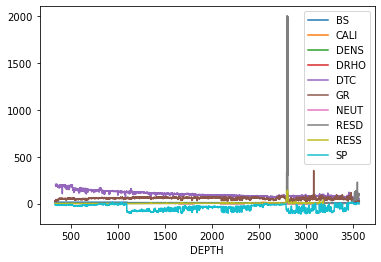

In [21]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales.

Lets plot individual curves by supplying a y variable argument like so:

<AxesSubplot:xlabel='DEPTH'>

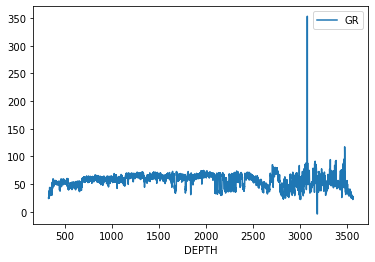

In [22]:
well.plot(y='GR')

This allows us to view the Gamma Ray Curve on its own. We can change the variable to any other curve within the dataframe and view it as follows: 

<AxesSubplot:xlabel='DEPTH'>

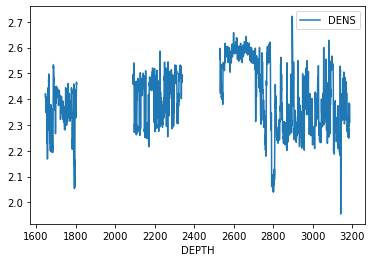

In [24]:
well.plot(y='DENS')

<AxesSubplot:xlabel='DEPTH'>

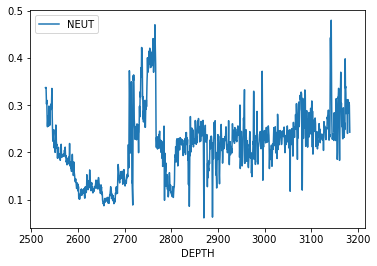

In [25]:
well.plot(y='NEUT')

<AxesSubplot:xlabel='DEPTH'>

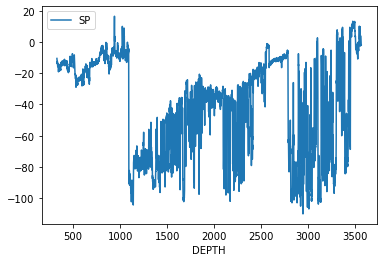

In [26]:
well.plot(y='SP')

<AxesSubplot:xlabel='DEPTH'>

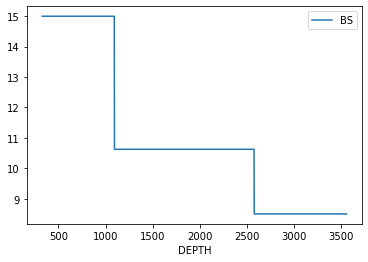

In [27]:
well.plot(y='BS')

<AxesSubplot:xlabel='DEPTH'>

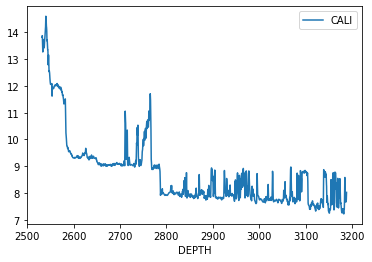

In [28]:
well.plot(y='CALI')

<AxesSubplot:xlabel='DEPTH'>

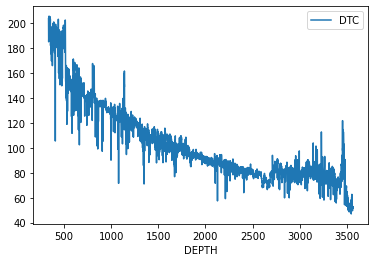

In [29]:
well.plot(y='DTC')

<AxesSubplot:xlabel='DEPTH'>

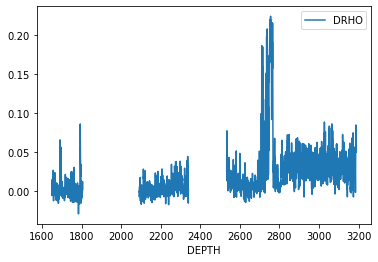

In [30]:
well.plot(y='DRHO')